In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [4]:
idir0='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/tvdTest/'
idir1='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/tvdTestVarShape/'
ts=dt.datetime(2015,4,1)
te=dt.datetime(2015,4,2)

In [5]:
fVlist0=et.index_model_files_flex(idir0,'ptrc_T','1d','long',ts,te)
fVlist1=et.index_model_files_flex(idir1,'ptrc_T','1d','long',ts,te)

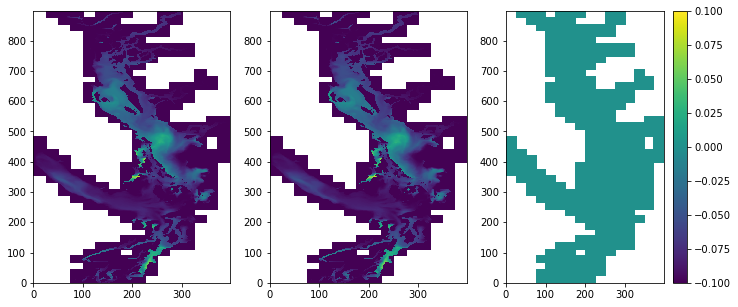

In [8]:
fig,ax=plt.subplots(1,3,figsize=(12,5))
with nc.Dataset(fVlist0.paths[0]) as ff0:
    with nc.Dataset(fVlist1.paths[0]) as ff1:
        m0=ax[0].pcolormesh(ff0.variables['diatoms'][1,0,:,:])
        m1=ax[1].pcolormesh(ff1.variables['diatoms'][1,0,:,:])
        m2=ax[2].pcolormesh(ff1.variables['diatoms'][1,0,:,:]-ff0.variables['diatoms'][1,0,:,:])
fig.colorbar(m2)

In [11]:
with nc.Dataset(fVlist0.paths[0]) as ff0:
    with nc.Dataset(fVlist1.paths[0]) as ff1:
        print(np.max(np.abs(ff1.variables['diatoms'][:,:,:,:]-ff0.variables['diatoms'][:2,:,:,:])))

0.0
